In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Travel.csv')

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [15]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [16]:
gender =  df['Gender'].str.split(" ").str[0]
gender.shape 

(4888,)

In [17]:
for i in range(len(gender)):
    if gender[i] == 'Fe':
        gender[i]='Female'

In [18]:
gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [19]:
df['Gender'] = gender

In [20]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})

In [21]:
df['Gender'].value_counts()

Gender
1    2916
0    1972
Name: count, dtype: int64

In [22]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [23]:
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(1)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

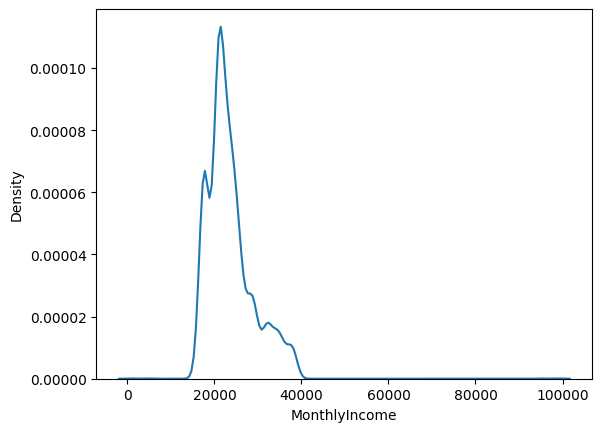

In [24]:
sns.kdeplot(df['MonthlyIncome'])

In [25]:
mean_monthlyIncome = df['MonthlyIncome'].mean()

In [26]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(mean_monthlyIncome)

In [27]:
median_numberOfTrips = df['NumberOfTrips'].median()

In [28]:
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(median_numberOfTrips)

In [29]:
df['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
Name: count, dtype: int64

In [30]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3)

In [31]:
df['DurationOfPitch'].median()

np.float64(13.0)

<Axes: xlabel='DurationOfPitch', ylabel='Density'>

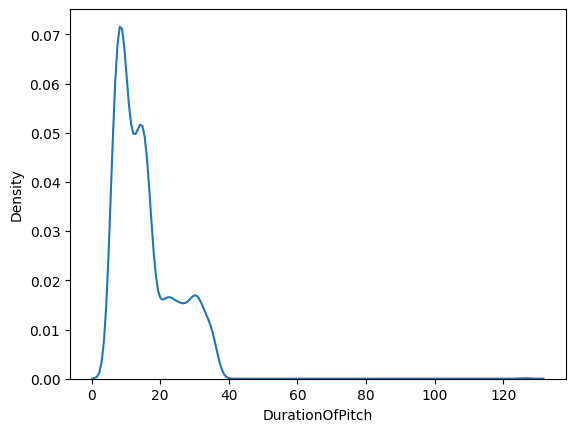

In [32]:
sns.kdeplot(df['DurationOfPitch'])

In [33]:
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

In [34]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
dtype: int64

In [35]:
df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

In [36]:
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median())

<Axes: xlabel='Age', ylabel='Density'>

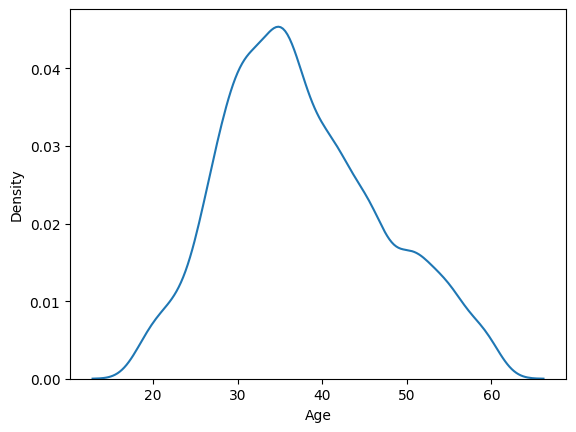

In [37]:
sns.kdeplot(df['Age'])

In [38]:
print(df['Age'].mean())
print(df['Age'].median())

37.62226512226512
36.0


In [39]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [40]:
df[df.isnull().any(axis=1)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,0,31.0,NaN,1,13.0,Small Business,1,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,23619.853491
571,0,26.0,NaN,1,13.0,Salaried,0,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,23619.853491
572,0,29.0,NaN,1,13.0,Small Business,0,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,23619.853491
576,0,27.0,NaN,3,13.0,Small Business,1,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,23619.853491
579,0,34.0,NaN,1,13.0,Small Business,0,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,23619.853491
598,1,28.0,NaN,1,13.0,Small Business,1,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,23619.853491
622,0,32.0,NaN,3,13.0,Salaried,1,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,23619.853491
724,0,24.0,NaN,1,13.0,Small Business,0,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,23619.853491
843,0,26.0,NaN,1,13.0,Small Business,1,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,23619.853491
1021,1,25.0,NaN,3,13.0,Salaried,1,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,23619.853491


In [41]:
df['TypeofContact'].isna().sum()

np.int64(25)

In [42]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')

In [43]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

In [44]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   int64  
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [46]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
col_to_encode = ['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation']

In [49]:
for col in col_to_encode :
    df[col] = encoder.fit_transform(df[col])

In [50]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,0,49.000000,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,1,37.000000,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0
3,0,33.000000,0,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,0,37.622265,1,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0


In [54]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.000000,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,49.000000,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,37.000000,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0
3,33.000000,0,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,37.622265,1,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(f"Confusoin metrics : \n{confusion_matrix(y_test,y_pred)}")
print(f"classification_report : \n{classification_report(y_test,y_pred)}")

Confusoin metrics : 
[[766  21]
 [113  78]]
classification_report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       787
           1       0.79      0.41      0.54       191

    accuracy                           0.86       978
   macro avg       0.83      0.69      0.73       978
weighted avg       0.86      0.86      0.85       978



In [57]:
gbc_cv = GradientBoostingClassifier()

In [63]:
gbc_params = {
    "loss" : ['log_loss', 'exponential'],
    "learning_rate" : [0.1,0.01,0.001],
    "n_estimators" : [70,80,90],
    "criterion" : ['friedman_mse','squared_error'],
    "max_features" : ["sqrt", "log2"]
}

In [64]:
## Hyperparmeter Tunning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gbc_cv,param_grid=gbc_params,cv=5,verbose=2)

In [65]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=80; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt, n_estimators=80; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=sqrt

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [70, 80, 90]},
             verbose=2)

In [66]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_features': 'log2',
 'n_estimators': 90}

In [68]:
y_pred = grid.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(f"Confusoin metrics : \n{confusion_matrix(y_test,y_pred)}")
print(f"classification_report : \n{classification_report(y_test,y_pred)}")

Confusoin metrics : 
[[768  19]
 [126  65]]
classification_report : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       787
           1       0.77      0.34      0.47       191

    accuracy                           0.85       978
   macro avg       0.82      0.66      0.69       978
weighted avg       0.84      0.85      0.83       978



In [70]:
gbc_cv = GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.1,
 loss='log_loss',
 max_features= 'log2',
 n_estimators= 90)

In [72]:
gbc_cv.fit(X_train,y_train)

GradientBoostingClassifier(max_features='log2', n_estimators=90)

In [73]:
y_pred = gbc_cv.predict(X_test)

In [74]:
print(f"Confusoin metrics : \n{confusion_matrix(y_test,y_pred)}")
print(f"classification_report : \n{classification_report(y_test,y_pred)}")

Confusoin metrics : 
[[759  28]
 [121  70]]
classification_report : 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       787
           1       0.71      0.37      0.48       191

    accuracy                           0.85       978
   macro avg       0.79      0.67      0.70       978
weighted avg       0.83      0.85      0.83       978

